In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import cm
from dask import dataframe as dd
from pathlib import Path
import matplotlib.colors as mcolors

def pandas_index_localize(df):
    df.index = df.index.map(lambda x: pd.Timestamp(x).tz_localize('UTC'))
    return df

In [2]:
my_fill = 8491
my_path = Path('/home/sterbini/japw22_lifetime/cross_sections_parquet')
B1_df = pandas_index_localize(pd.read_parquet(my_path/f'{my_fill}_B1.parquet'))
B2_df = pandas_index_localize(pd.read_parquet(my_path/f'{my_fill}_B2.parquet'))
lumi_df = pandas_index_localize(pd.read_parquet(f'/eos/project/l/lhc-lumimod/LuminosityFollowUp/2022_dev/rawdata/HX:FILLN={my_fill}/HX:BMODE=STABLE', 
    columns=['ATLAS:LUMI_TOT_INST',
             'CMS:LUMI_TOT_INST',
             'ALICE:LUMI_TOT_INST',
             'LHCB:LUMI_TOT_INST',        
]).sort_index())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


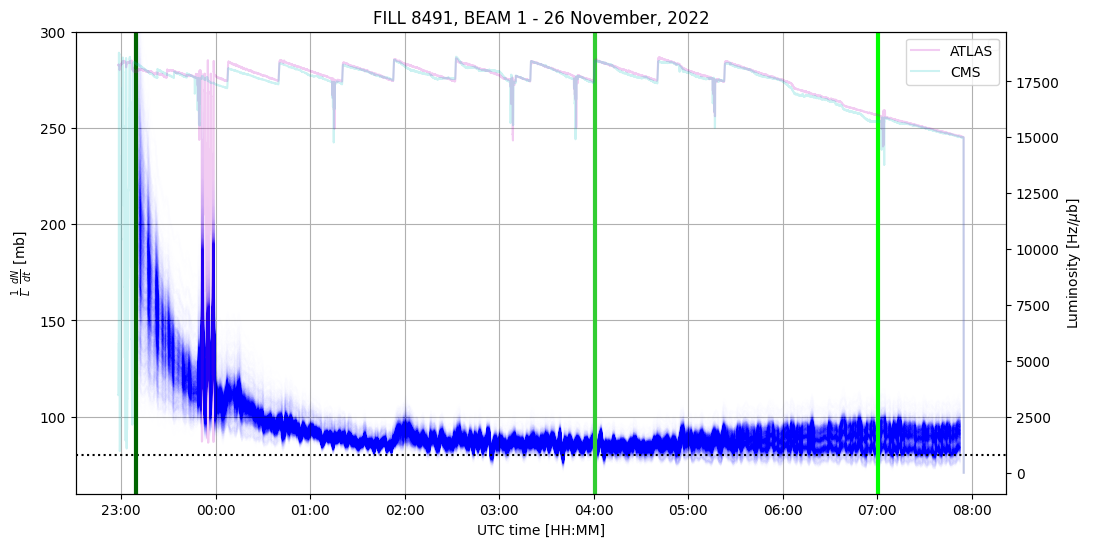

In [5]:
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)

my_df = pd.DataFrame(np.vstack(B1_df['sig_eff'].to_numpy())[:,90:]*1000,index = B1_df.index)
plt.plot(my_df,'b',alpha=.004)
#my_df = pd.DataFrame(np.vstack(B2_df['sig_eff'].to_numpy())[:,90:]*1000,index = B2_df.index)
#plt.plot(my_df,'r',alpha=.004)
plt.ylim([60,300])
xfmt = md.DateFormatter('%H:%M')
plt.title(f'FILL {my_fill}, BEAM 1 - {pd.Timestamp(B1_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('UTC time [HH:MM]')
plt.ylabel('$\\frac{1}{L}~\\frac{dN}{dt}$ [mb]')
#xlim_1 = pd.Timestamp('2022-11-26 23:30')
#xlim_2 = pd.Timestamp('2022-11-27 07:30')
#plt.xlim(xlim_1, xlim_2)
#plt.ylim(.8, 2.7)

plt.gca().xaxis.set_major_formatter(xfmt)
plt.legend(loc = 'best')
plt.grid(True)
plt.axhline(80,color='k', ls=':')

if True: 
    ax2 = ax.twinx()
    ax2.set_ylabel('Luminosity [Hz/$\mu$b]')
    ax2.plot(lumi_df['ATLAS:LUMI_TOT_INST'].dropna(),'m', alpha=.2,label='ATLAS')
    ax2.plot(lumi_df['CMS:LUMI_TOT_INST'].dropna(),'c', alpha=.2, label='CMS')
    ax2.tick_params(axis='y', colors='k')
    ax2.legend(loc='best')

ax.axvline(B1_df['sig_eff'].index[0], color=mcolors.CSS4_COLORS['darkgreen'], lw=3)
ax.axvline(B1_df['sig_eff'].between_time('04:00','05:00').index[0], color= mcolors.CSS4_COLORS['limegreen'], lw=3)
ax.axvline(B1_df['sig_eff'].between_time('07:00','08:00').index[0], color= mcolors.CSS4_COLORS['lime'], lw=3)

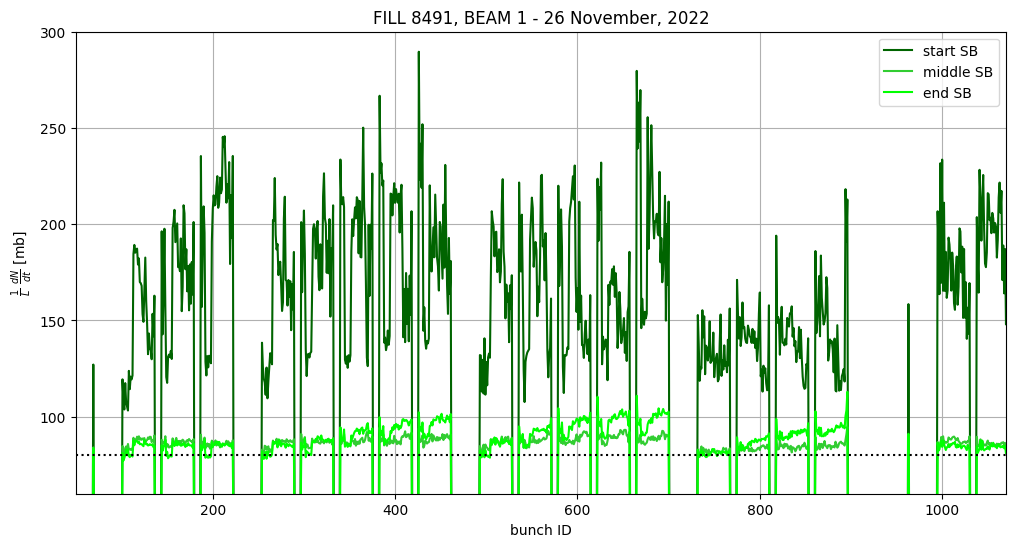

In [3]:
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)
my_index = 0
plt.plot(B1_df['sig_eff'].iloc[0]*1000, color = mcolors.CSS4_COLORS['darkgreen'], label = 'start SB')

plt.plot(B1_df['sig_eff'].between_time('04:00','05:00').iloc[0]*1000, color = mcolors.CSS4_COLORS['limegreen'], label = 'middle SB')
plt.plot(B1_df['sig_eff'].between_time('07:00','08:00').iloc[0]*1000, color = mcolors.CSS4_COLORS['lime'], label = 'end SB')


#plt.plot(B2_df['sig_eff'].iloc[my_index]*1000, 'r', label = 'B2')

plt.ylim([60, 300])

xfmt = md.DateFormatter('%H:%M')
plt.title(f'FILL {my_fill}, BEAM 1 - {pd.Timestamp(B1_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('bunch ID')
plt.ylabel('$\\frac{1}{L}~\\frac{dN}{dt}$ [mb]')
#xlim_1 = pd.Timestamp('2022-11-26 23:30')
#xlim_2 = pd.Timestamp('2022-11-27 07:30')
plt.xlim(50, 1070)
#plt.gca().xaxis.set_major_formatter(xfmt)
plt.legend(loc = 'best')
plt.grid(True)
plt.axhline(80,color='k', ls=':')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


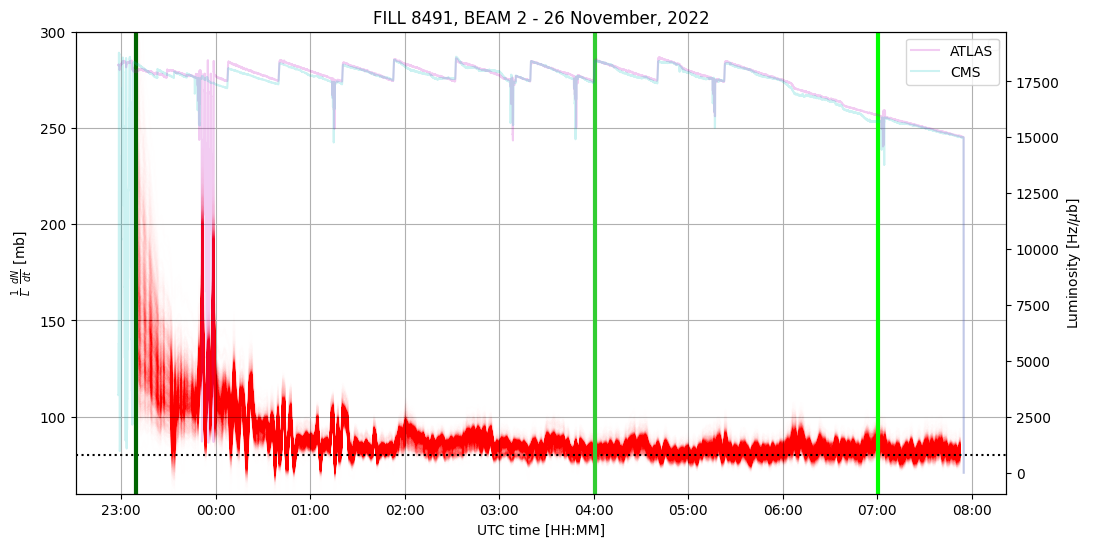

In [4]:
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)

my_df = pd.DataFrame(np.vstack(B2_df['sig_eff'].to_numpy())[:,90:]*1000,index = B2_df.index)
plt.plot(my_df,'r',alpha=.004)
#my_df = pd.DataFrame(np.vstack(B2_df['sig_eff'].to_numpy())[:,90:]*1000,index = B2_df.index)
#plt.plot(my_df,'r',alpha=.004)
plt.ylim([60,300])
xfmt = md.DateFormatter('%H:%M')
plt.title(f'FILL {my_fill}, BEAM 2 - {pd.Timestamp(B1_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('UTC time [HH:MM]')
plt.ylabel('$\\frac{1}{L}~\\frac{dN}{dt}$ [mb]')
#xlim_1 = pd.Timestamp('2022-11-26 23:30')
#xlim_2 = pd.Timestamp('2022-11-27 07:30')
#plt.xlim(xlim_1, xlim_2)
#plt.ylim(.8, 2.7)

plt.gca().xaxis.set_major_formatter(xfmt)
plt.legend(loc = 'best')
plt.grid(True)
plt.axhline(80,color='k', ls=':')

if True: 
    ax2 = ax.twinx()
    ax2.set_ylabel('Luminosity [Hz/$\mu$b]')
    ax2.plot(lumi_df['ATLAS:LUMI_TOT_INST'].dropna(),'m', alpha=.2,label='ATLAS')
    ax2.plot(lumi_df['CMS:LUMI_TOT_INST'].dropna(),'c', alpha=.2, label='CMS')
    ax2.tick_params(axis='y', colors='k')
    ax2.legend(loc='best')

ax.axvline(B2_df['sig_eff'].index[0], color=mcolors.CSS4_COLORS['darkgreen'], lw=3)
ax.axvline(B2_df['sig_eff'].between_time('04:00','05:00').index[0], color= mcolors.CSS4_COLORS['limegreen'], lw=3)
ax.axvline(B2_df['sig_eff'].between_time('07:00','08:00').index[0], color= mcolors.CSS4_COLORS['lime'], lw=3)

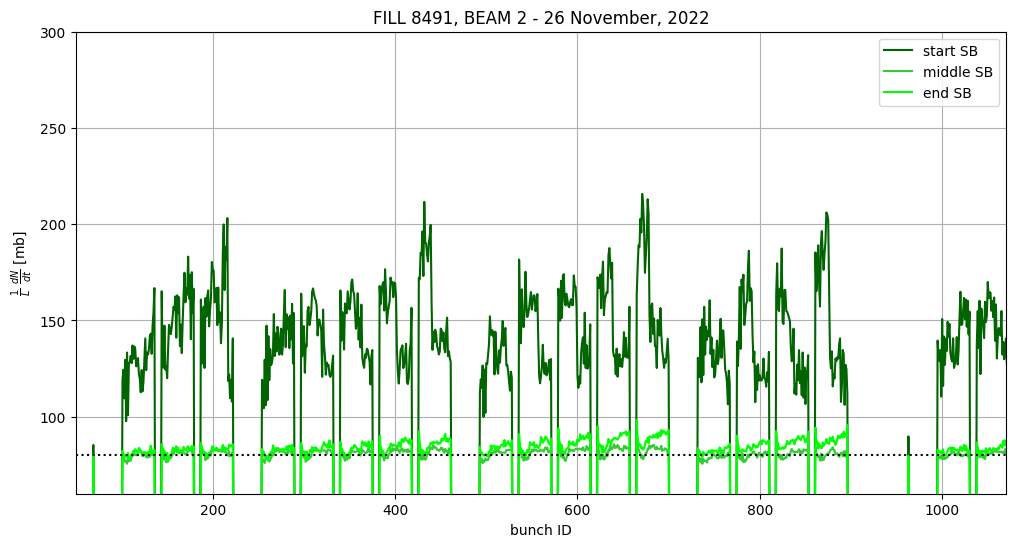

In [5]:
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)
my_index = 0
plt.plot(B2_df['sig_eff'].iloc[0]*1000, color = mcolors.CSS4_COLORS['darkgreen'], label = 'start SB')

plt.plot(B2_df['sig_eff'].between_time('04:00','05:00').iloc[0]*1000, color = mcolors.CSS4_COLORS['limegreen'], label = 'middle SB')
plt.plot(B2_df['sig_eff'].between_time('07:00','08:00').iloc[0]*1000, color = mcolors.CSS4_COLORS['lime'], label = 'end SB')


#plt.plot(B2_df['sig_eff'].iloc[my_index]*1000, 'r', label = 'B2')

plt.ylim([60, 300])

xfmt = md.DateFormatter('%H:%M')
plt.title(f'FILL {my_fill}, BEAM 2 - {pd.Timestamp(B1_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('bunch ID')
plt.ylabel('$\\frac{1}{L}~\\frac{dN}{dt}$ [mb]')
#xlim_1 = pd.Timestamp('2022-11-26 23:30')
#xlim_2 = pd.Timestamp('2022-11-27 07:30')
plt.xlim(50, 1070)
#plt.gca().xaxis.set_major_formatter(xfmt)
plt.legend(loc = 'best')
plt.grid(True)
plt.axhline(80,color='k', ls=':')

In [6]:
my_fill = 8124
my_path = Path('/home/sterbini/japw22_lifetime/cross_sections_parquet')
B1_df = pandas_index_localize(pd.read_parquet(my_path/f'{my_fill}_B1.parquet'))
B2_df = pandas_index_localize(pd.read_parquet(my_path/f'{my_fill}_B2.parquet'))
lumi_df = pandas_index_localize(pd.read_parquet(f'/eos/project/l/lhc-lumimod/LuminosityFollowUp/2022_test_v0.2.2/HX:FILLN={my_fill}/HX:BMODE=STABLE/', 
    columns=['ATLAS:LUMI_TOT_INST',
             'CMS:LUMI_TOT_INST',
             'ALICE:LUMI_TOT_INST',
             'LHCB:LUMI_TOT_INST',   
             'RPMC.UL557.RBBCW.R5B2:I_MEAS',              
]).sort_index())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


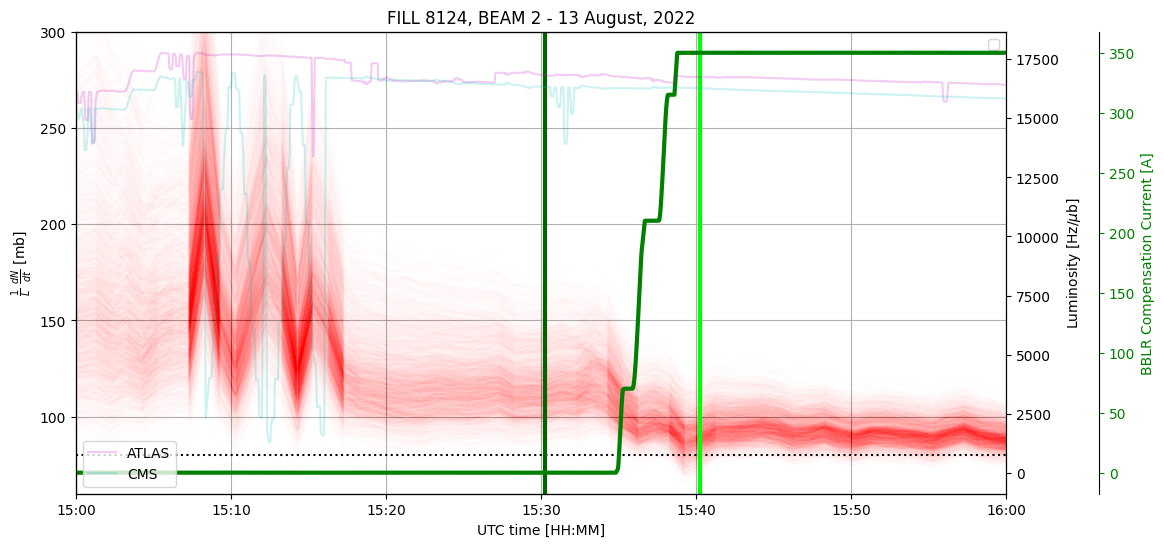

In [10]:
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)

my_df = pd.DataFrame(np.vstack(B2_df['sig_eff'].to_numpy())[:,90:]*1000,index = B2_df.index)
plt.plot(my_df,'r',alpha=.004)
#my_df = pd.DataFrame(np.vstack(B2_df['sig_eff'].to_numpy())[:,90:]*1000,index = B2_df.index)
#plt.plot(my_df,'r',alpha=.004)
plt.ylim([60,300])
xfmt = md.DateFormatter('%H:%M')
plt.title(f'FILL {my_fill}, BEAM 2 - {pd.Timestamp(B1_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('UTC time [HH:MM]')
plt.ylabel('$\\frac{1}{L}~\\frac{dN}{dt}$ [mb]')
xlim_1 = pd.Timestamp('2022-08-13 15:00')
xlim_2 = pd.Timestamp('2022-08-13 16:00')
plt.xlim(xlim_1, xlim_2)
#plt.ylim(.8, 2.7)

plt.gca().xaxis.set_major_formatter(xfmt)
plt.legend(loc = 'best')
plt.grid(True)
plt.axhline(80,color='k', ls=':')

if True: 
    ax3 = ax.twinx()
    ax3.spines.right.set_position(("axes", 1.1))
    ax3.set_ylabel('BBLR Compensation Current [A]')
    ax3.plot(lumi_df['RPMC.UL557.RBBCW.R5B2:I_MEAS'].dropna(),'g',lw=3)
    ax3.tick_params(axis='y', colors='g')
    ax3.yaxis.label.set_color('g')


if True: 
    ax2 = ax.twinx()
    ax2.set_ylabel('Luminosity [Hz/$\mu$b]')
    ax2.plot(lumi_df['ATLAS:LUMI_TOT_INST'].dropna(),'m', alpha=.2,label='ATLAS')
    ax2.plot(lumi_df['CMS:LUMI_TOT_INST'].dropna(),'c', alpha=.2, label='CMS')
    ax2.tick_params(axis='y', colors='k')
    ax2.legend(loc='best')


ax.axvline(B2_df['sig_eff'].between_time('15:30','15:38').index[0], color= mcolors.CSS4_COLORS['darkgreen'], lw=3)
ax.axvline(B2_df['sig_eff'].between_time('15:40','15:44').index[0], color= mcolors.CSS4_COLORS['lime'], lw=3)

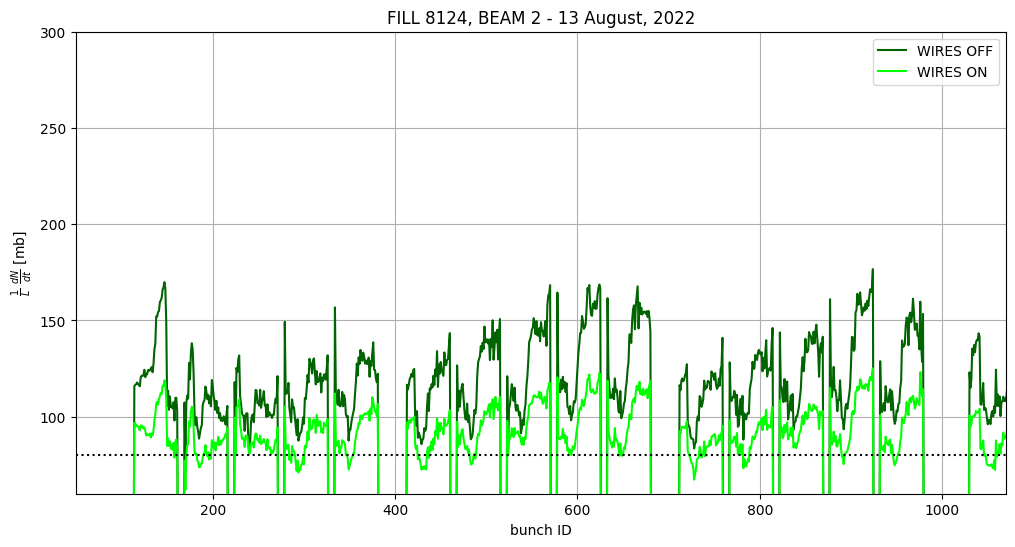

In [12]:
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)
my_index = 0

plt.plot(B2_df['sig_eff'].between_time('15:30','15:38').iloc[0]*1000, color = mcolors.CSS4_COLORS['darkgreen'], label = 'WIRES OFF')
plt.plot(B2_df['sig_eff'].between_time('15:40','15:44').iloc[0]*1000, color = mcolors.CSS4_COLORS['lime'], label = 'WIRES ON')


#plt.plot(B2_df['sig_eff'].iloc[my_index]*1000, 'r', label = 'B2')

plt.ylim([60, 300])

xfmt = md.DateFormatter('%H:%M')
plt.title(f'FILL {my_fill}, BEAM 2 - {pd.Timestamp(B1_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('bunch ID')
plt.ylabel('$\\frac{1}{L}~\\frac{dN}{dt}$ [mb]')
#xlim_1 = pd.Timestamp('2022-11-26 23:30')
#xlim_2 = pd.Timestamp('2022-11-27 07:30')
plt.xlim(50, 1070)
#plt.gca().xaxis.set_major_formatter(xfmt)
plt.legend(loc = 'best')
plt.grid(True)
plt.axhline(80,color='k', ls=':')

# Not for the slides

In [11]:
def my_average(x):
    a = x[90:]
    return a[np.nonzero(a)].mean()*1000


fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)
plt.plot(B1_df['sig_eff'].apply(my_average))
plt.plot(B2_df['sig_eff'].apply(my_average))

In [ ]:
my_fill = 8124
my_path = Path('/home/sterbini/japw22_lifetime/cross_sections_parquet')
B1_df = pandas_index_localize(pd.read_parquet(my_path/f'{my_fill}_B1.parquet'))
B2_df = pandas_index_localize(pd.read_parquet(my_path/f'{my_fill}_B2.parquet'))
lumi_df = pandas_index_localize(pd.read_parquet(f'/eos/project/l/lhc-lumimod/LuminosityFollowUp/2022_dev/rawdata/HX:FILLN={my_fill}/HX:BMODE=STABLE', 
    columns=['ATLAS:LUMI_TOT_INST',
             'CMS:LUMI_TOT_INST',
             'ALICE:LUMI_TOT_INST',
             'LHCB:LUMI_TOT_INST',        
]).sort_index())